<a href="https://colab.research.google.com/github/metalusuraimu/DL_learning/blob/master/DL_learning/lecture5/simple_rnn_ipynb_kabuka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# シンプルなRNNの実装
PyTorchを使って、シンプルな再帰型ニューラルネットワーク（RNN）を実装します。  
RNNにノイズ付きサインカーブを学習させて、1つ先の未来を予測することによる曲線の描画を行います。


## 訓練用データの作成
まずは、サインカーブに乱数でノイズを加えてRNNに用いる訓練用のデータを作成します。

csvファイルの読み込みを行う。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
from sklearn.preprocessing import normalize
data= pd.read_csv('drive/My Drive/Data/sp500.csv')

(100,)


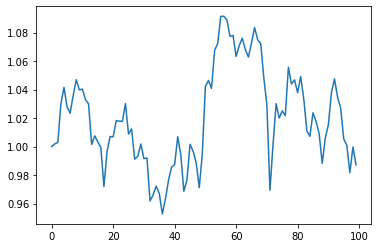

In [ ]:
plt.plot(data)
data = np.array(data)
data = data.reshape(-1)

# すごい雑な正規化
data = data / data[0]
data = data[0:100]
len(data)
print(np.shape(data))

## データの前処理
入力、正解データをRNNに適した形に整えます。  
時系列から次の値を予測できるように、時系列を入力として正解はその1つ後の値とします。 

In [ ]:
import torch
from torch.utils.data import DataLoader

n_time = 10  # 時系列の数
n_sample = len(data)-n_time  # サンプル数

input_data = np.zeros((n_sample, n_time, 1))  # 入力
correct_data = np.zeros((n_sample, 1))  # 正解
for i in range(n_sample):
    input_data[i] = data[i:i+n_time].reshape(-1, 1)
    correct_data[i] = data[i+n_time:i+n_time+1]  # 正解は入力よりも一つ後

input_data = torch.tensor(input_data, dtype=torch.float)  # テンソルに変換
correct_data = torch.tensor(correct_data, dtype=torch.float)
dataset = torch.utils.data.TensorDataset(input_data, correct_data)  # データセットの作成

train_loader = DataLoader(dataset, batch_size=8, shuffle=True)  # DataLoaderの設定

input_data
correct_data

tensor([[1.0404],
        [1.0330],
        [1.0300],
        [1.0015],
        [1.0076],
        [1.0033],
        [0.9994],
        [0.9719],
        [0.9965],
        [1.0070],
        [1.0069],
        [1.0183],
        [1.0178],
        [1.0177],
        [1.0302],
        [1.0088],
        [1.0124],
        [0.9912],
        [0.9932],
        [1.0019],
        [0.9916],
        [0.9920],
        [0.9619],
        [0.9662],
        [0.9723],
        [0.9671],
        [0.9528],
        [0.9633],
        [0.9764],
        [0.9855],
        [0.9874],
        [1.0070],
        [0.9942],
        [0.9687],
        [0.9766],
        [1.0016],
        [0.9969],
        [0.9887],
        [0.9712],
        [0.9948],
        [1.0422],
        [1.0465],
        [1.0409],
        [1.0675],
        [1.0723],
        [1.0914],
        [1.0915],
        [1.0889],
        [1.0774],
        [1.0780],
        [1.0632],
        [1.0709],
        [1.0761],
        [1.0681],
        [1.0628],
        [1

## モデルの構築
`nn.Module`モジュールを継承したクラスとして、モデルを構築します。  
RNNは`nn.RNN`を使って実装することができます。

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(  # RNN層
            input_size=1,  # 入力サイズ
            hidden_size=64,  # ニューロン数
            batch_first=True,  # 入力を (バッチサイズ, 時系列の数, 入力の数) にする
        )
        self.fc = nn.Linear(64, 1)  # 全結合層

    def forward(self, x):
        y_rnn, h = self.rnn(x, None)  # hは次の時刻に渡される値、 Noneでその初期値が0に
        y = self.fc(y_rnn[:, -1, :])  # yは最後の時刻の出力
        return y

net = Net()
print(net)

Net(
  (rnn): RNN(1, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


## 学習
モデルを訓練します。  
DataLoaderを使い、ミニバッチを取り出して訓練および評価を行います。  
訓練したモデルを使い、直近の時系列を使った予測結果を次々と時系列に加えていくことにより、曲線が生成されます。  
学習が進むとともに次第にサインカーブが生成されるようになりますが、曲線は一定のエポック間隔でグラフとして描画されます。  

Epoch: 0 Loss_Train: 0.000407534039671494


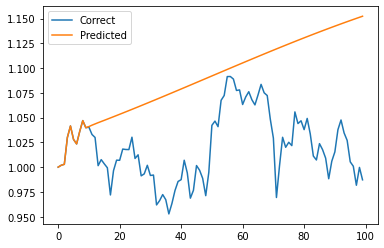

Epoch: 2 Loss_Train: 0.00038716097697033547


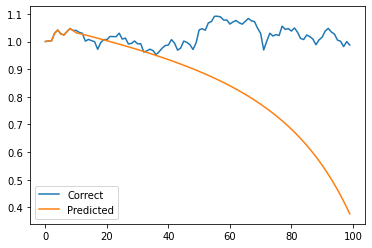

Epoch: 4 Loss_Train: 0.00041158797466778196


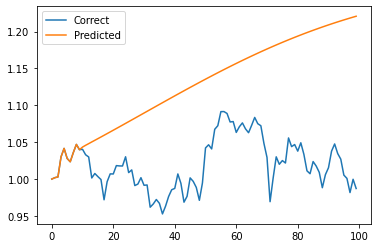

Epoch: 6 Loss_Train: 0.00037955836827071227


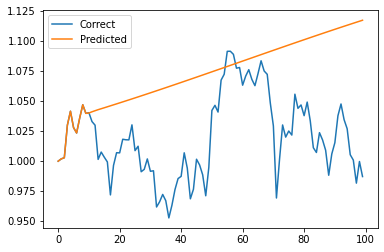

Epoch: 8 Loss_Train: 0.00038781749208283145


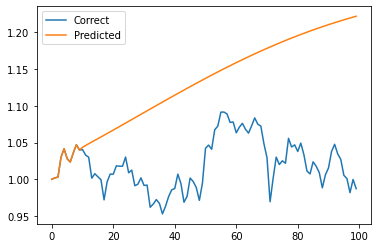

Epoch: 10 Loss_Train: 0.0003864665668515954


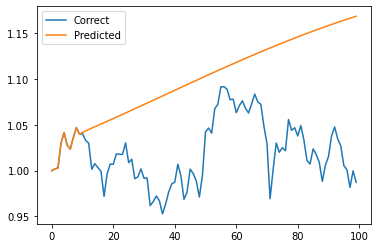

Epoch: 12 Loss_Train: 0.00040429827398232493


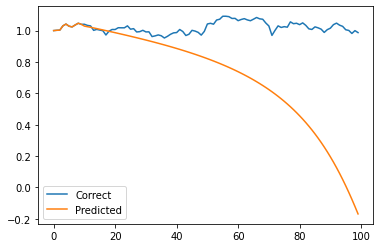

Epoch: 14 Loss_Train: 0.0004163752989067386


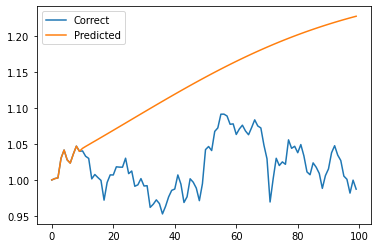

Epoch: 16 Loss_Train: 0.00039895464821408194


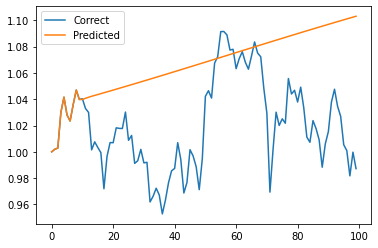

Epoch: 18 Loss_Train: 0.00038405142064827186


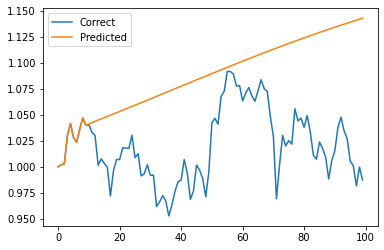

Epoch: 20 Loss_Train: 0.0003886844715452753


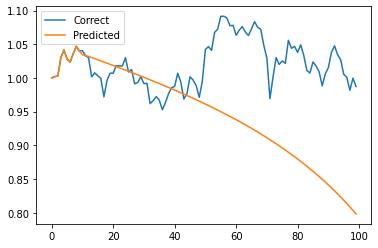

Epoch: 22 Loss_Train: 0.00039314682605133083


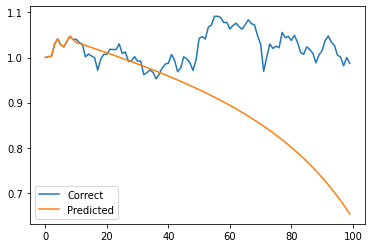

Epoch: 24 Loss_Train: 0.0004628463393601123


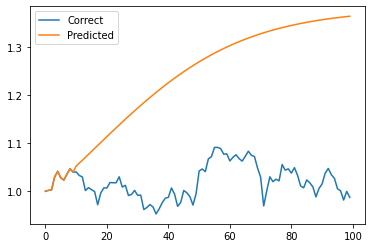

Epoch: 26 Loss_Train: 0.0003927963795528437


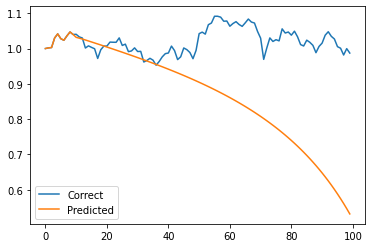

Epoch: 28 Loss_Train: 0.00040911491426716867


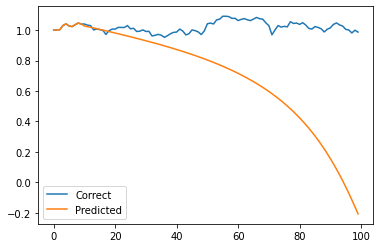

Epoch: 30 Loss_Train: 0.0003776567480902789


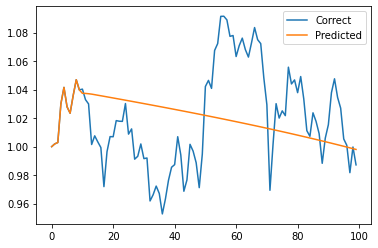

Epoch: 32 Loss_Train: 0.0003940850741249354


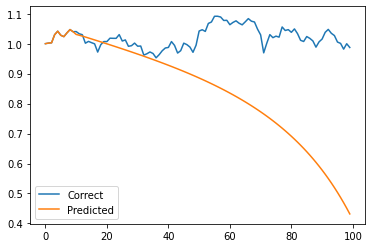

Epoch: 34 Loss_Train: 0.0004191935119403449


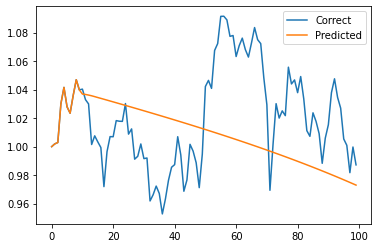

Epoch: 36 Loss_Train: 0.0003785067709335029


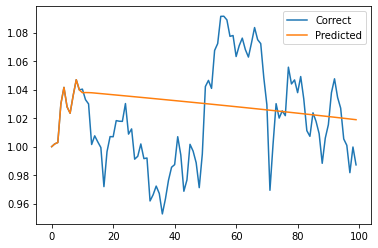

Epoch: 38 Loss_Train: 0.0006259477280157929


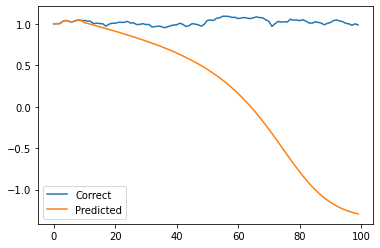

Epoch: 40 Loss_Train: 0.0003965990945289377


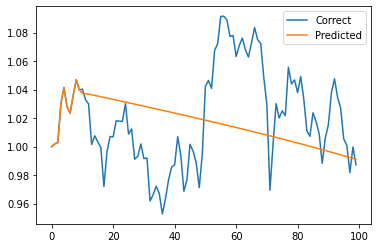

Epoch: 42 Loss_Train: 0.00041048207943579956


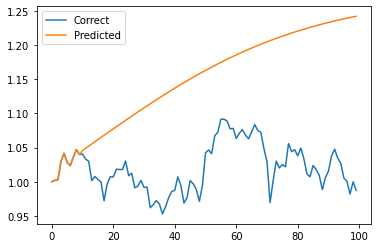

Epoch: 44 Loss_Train: 0.0004056636086412861


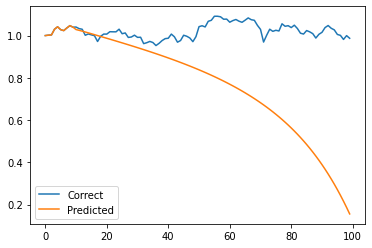

Epoch: 46 Loss_Train: 0.0003995239021605812


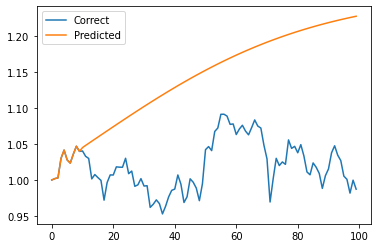

Epoch: 48 Loss_Train: 0.0003872424967994448


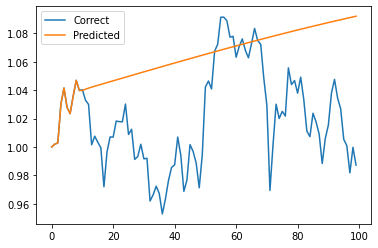

In [ ]:
from torch import optim

# 交差エントロピー誤差関数
loss_fnc = nn.MSELoss()

# 最適化アルゴリズム
optimizer = optim.SGD(net.parameters(), lr=0.01)  # 学習率は0.01

# 損失のログ
record_loss_train = []

# 学習
for i in range(50):  # 50エポック学習
    net.train()  # 訓練モード
    loss_train = 0
    for j, (x, t) in enumerate(train_loader):  # ミニバッチ（x, t）を取り出す
        y = net(x)
        loss = loss_fnc(y, t)
        loss_train += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_train /= j+1
    record_loss_train.append(loss_train)

    if i%2 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train)
        predicted = list(input_data[0].reshape(-1)) # 最初の入力
        for i in range(n_sample):
            x = torch.tensor(predicted[-n_time:])  # 直近の時系列を取り出す
            x = x.reshape(1, n_time, 1)  # (バッチサイズ, 時系列の数, 入力の数)
            y = net(x)
            predicted.append(y[0].item())  # 予測結果をpredictedに追加する

        plt.plot(range(len(data)), data, label="Correct")
        plt.plot(range(len(predicted)), predicted, label="Predicted")
        plt.legend()
        plt.show()
        

## 誤差の推移
訓練データ、テストデータで誤差の推移をグラフ表示します。  

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

滑らかに誤差が減少していることが確認できます。